In this notebook we:
(1) provide a simple implementation of polynomial regression. 
(2) visualize an example of a linear constraint on a convex objective function
(3) visualize how ReLU neural networks give rise to continuous piecewise linear functions

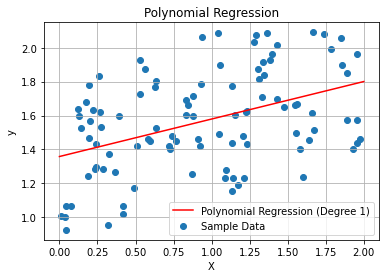

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def polyregress(deg, noise=0.2):
    # Generate some sample data
    np.random.seed(0)
    X = 2 * np.random.rand(100, 1)
    y = 1 + 0.3 * X + 0.5 * np.sin(8*X)**2
    y += np.random.normal(np.zeros_like(y), noise, y.shape) #+ np.random.randn(100, 1)

    # Define the degree of the polynomial
    degree = deg

    # Function to perform polynomial regression
    def polynomial_regression(X, y, degree):
        X_poly = np.zeros((X.shape[0], degree))
        
        for d in range(1, degree + 1):
            X_poly[:, d - 1] = X[:, 0]**d
        
        X_poly = np.concatenate((np.ones((X.shape[0], 1)), X_poly), axis=1)
        theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
        
        return theta

    # Fit the polynomial regression model
    theta = polynomial_regression(X, y, degree)

    # Generate points for the polynomial curve
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    X_poly_test = np.zeros((X_test.shape[0], degree))
    for d in range(1, degree + 1):
        X_poly_test[:, d - 1] = X_test[:, 0]**d

    X_poly_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_poly_test), axis=1)
    y_pred = X_poly_test.dot(theta)

    # Plot the original data and the polynomial regression curve
    plt.scatter(X, y, label='Sample Data')
    plt.plot(X_test, y_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('Polynomial Regression')
    plt.grid(True)
    plt.show()


polyregress(1)

We encourage the reader to play with the degree and noise parameters, or change the underlying function altogether.

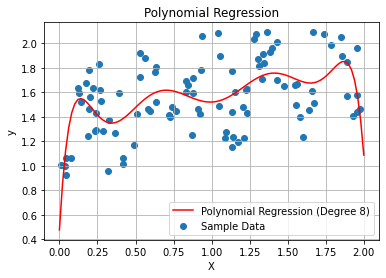

In [11]:
polyregress(8, noise=0.2)

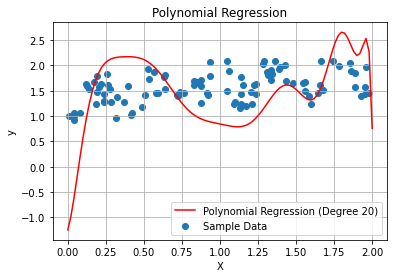

In [21]:
polyregress(20)

We also provide a brief visualization of minimizing a convex objective with a linear constraint. We use cvxpy, a python library, to do most of the heavy lifting. 

Optimal value: 8.0
Optimal x: -4.328407003662079e-17
Optimal y: 1.0


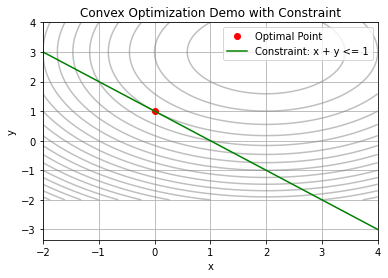

In [58]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the optimization problem variables
x = cp.Variable()
y = cp.Variable()

# Define the objective function (a simple convex quadratic)
objective = cp.Minimize((x - 2)**2 + (y - 3)**2)

# Define the constraint (x + y >= 1)
constraint = [x + y <= 1]

# Create the optimization problem
problem = cp.Problem(objective, constraint)

# Solve the problem
problem.solve()

# Print the results
print("Optimal value:", problem.value)
print("Optimal x:", x.value)
print("Optimal y:", y.value)

# Plot the objective function, constraint, and the optimal point
x_vals = np.linspace(-2, 4, 100)
y_vals = np.linspace(-2, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (X - 2)**2 + (Y - 3)**2

plt.contour(X, Y, Z, levels=20, colors='gray', alpha=0.5)  # Plot the objective function
plt.plot(x.value, y.value, 'ro', label='Optimal Point')  # Mark the optimal point
plt.plot(x_vals, 1 - x_vals, 'g-', label='Constraint: x + y <= 1')  # Plot the constraint
plt.xlabel('x')
plt.ylabel('y')
plt.title('Convex Optimization Demo with Constraint')
plt.legend()
plt.grid(True)
plt.show()


In the next section, we illustrate the functions generated by randomly initialized ReLU neural networks.

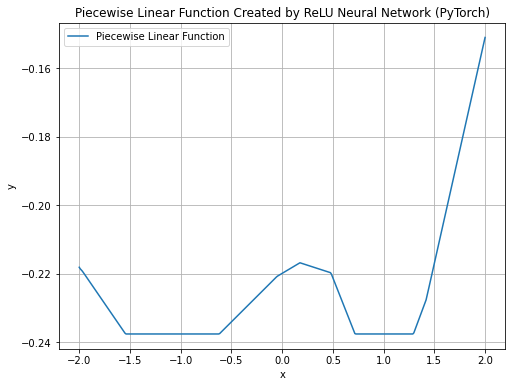

In [107]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define a custom neural network class with flexible hidden layers
class CustomNN(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(CustomNN, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims + [output_dim]
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            if i < len(dims) - 2:
                layers.append(nn.ReLU())
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# Create a PyTorch neural network with flexible hidden layers
input_dim = 1  # Input dimension
hidden_dims = [5, 5, 5]  # List of hidden layer dimensions
output_dim = 1  # Output dimension

model = CustomNN(input_dim, hidden_dims, output_dim)

# Generate x values
x_values = np.linspace(-2, 2, 400)

# Convert x values to PyTorch tensors
x_tensor = torch.Tensor(x_values).view(-1, 1)

# Calculate the corresponding y values using the neural network
with torch.no_grad():
    y_tensor = model(x_tensor)
    y_values = y_tensor.numpy()

# Plot the piecewise linear function created by the ReLU network
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="Piecewise Linear Function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Piecewise Linear Function Created by ReLU Neural Network (PyTorch)")
plt.grid(True)
plt.legend()
plt.show()

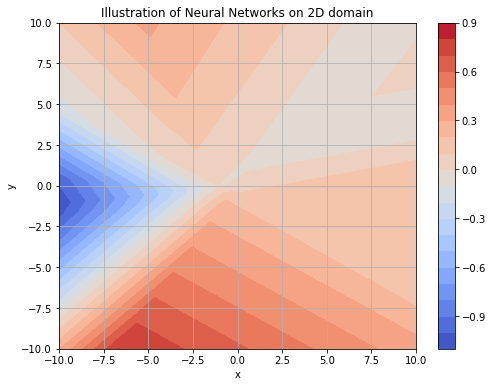

In [117]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define a custom neural network class with flexible hidden layers for 2D input
class CustomNN(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(CustomNN, self).__init__()
        layers = []
        dims = [input_dim] + hidden_dims + [output_dim]
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1]))
            if i < len(dims) - 2:
                layers.append(nn.ReLU())
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# Create a PyTorch neural network with flexible hidden layers for 2D input
input_dim = 2  # Input dimension (2D)
hidden_dims = [5, 5]  # List of hidden layer dimensions
output_dim = 1  # Output dimension

model = CustomNN(input_dim, hidden_dims, output_dim)

# Generate grid points in the x-y plane
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
input_data = torch.Tensor(np.vstack((X.ravel(), Y.ravel())).T)

# Calculate the corresponding z values using the neural network
with torch.no_grad():
    z_tensor = model(input_data).numpy().reshape(X.shape)


# Create a contour plot to visualize the partition
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, z_tensor, levels=20, cmap='coolwarm')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Illustration of Neural Networks on 2D domain")
plt.colorbar(contour)
plt.grid(True)
plt.show()